In [2]:
import pickle
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from pathlib import Path
from spice.spectrum import AB_passband_luminosity
from spice.spectrum.filter import Bolometric, GaiaG, GaiaRP, GaiaBP
import matplotlib
%matplotlib inline

# Load the pickle files
with open("/Users/mjablons/Documents/stellar-mesh-integration/tutorial/paper_results/tz_fornacis_data_eclipses_40000.pkl", "rb") as f:
    data = pickle.load(f)

UnpicklingError: pickle data was truncated

In [8]:
data.keys()

dict_keys(['spectra_body1', 'spectra_body2', 'mesh_body1', 'mesh_body2', 'wavelengths', 'times'])

In [9]:
gaia_g = GaiaG()
gaia_rp = GaiaRP()
gaia_bp = GaiaBP()
bol = Bolometric()

In [10]:
times = data['times']
pb1 = data['mesh_body1']
pb2 = data['mesh_body2']
spectra1 = data['spectra_body1']
spectra2 = data['spectra_body2']
wavelengths = data['wavelengths']

In [11]:
mag_g = [AB_passband_luminosity(gaia_g, data['wavelengths'], s1[:, 0]+s2[:, 0])
         for s1, s2 in zip(spectra1, spectra2)][10:]
mag_rp = [AB_passband_luminosity(gaia_rp, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)][10:]
mag_bp = [AB_passband_luminosity(gaia_bp, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)][10:]
mag_bol = [AB_passband_luminosity(bol, data['wavelengths'], s1[:, 0]+s2[:, 0])
           for s1, s2 in zip(spectra1, spectra2)][10:]
times = data['times'][10:]

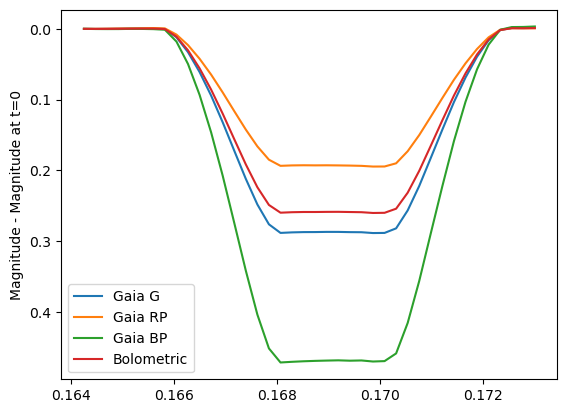

In [12]:
plt.plot(times, np.array(mag_g)-mag_g[0], label='Gaia G')
plt.plot(times, np.array(mag_rp)-mag_rp[0], label='Gaia RP')
plt.plot(times, np.array(mag_bp)-mag_bp[0], label='Gaia BP')
plt.plot(times, np.array(mag_bol)-mag_bol[0], label='Bolometric')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('Magnitude - Magnitude at t=0')
plt.show()

Primary eclipse time: 0.158 days
Secondary eclipse time: 0.158 days


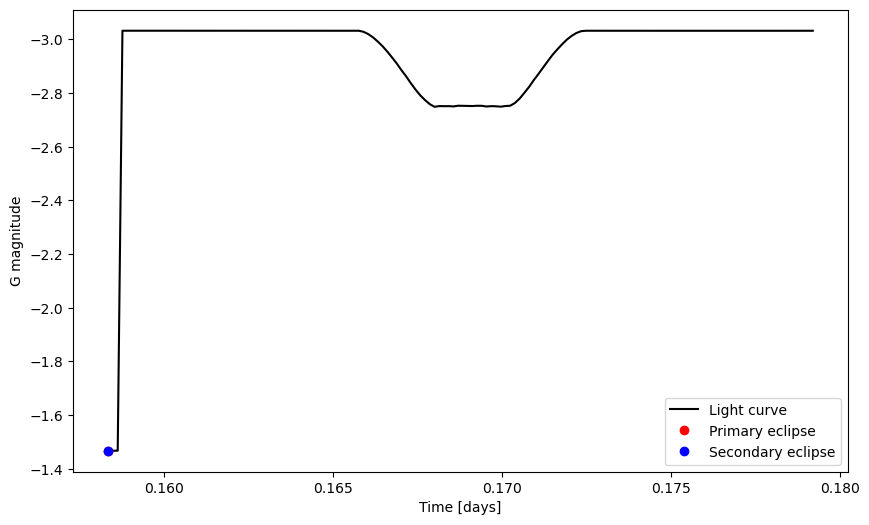

In [7]:
# Find the time of primary and secondary eclipse by looking at the light curve minima
mag_g_array = np.array(mag_g)
primary_eclipse_idx = np.argmax(mag_g_array)
secondary_eclipse_idx = np.argmax(mag_g_array[:int(len(mag_g)/2)])

primary_eclipse_time = times[primary_eclipse_idx]
secondary_eclipse_time = times[secondary_eclipse_idx]

print(f"Primary eclipse time: {primary_eclipse_time:.3f} days")
print(f"Secondary eclipse time: {secondary_eclipse_time:.3f} days")

# Plot the light curve with eclipse points marked
plt.figure(figsize=(10, 6))
plt.plot(times, mag_g_array, 'k-', label='Light curve')
plt.plot(primary_eclipse_time, mag_g_array[primary_eclipse_idx], 'ro', label='Primary eclipse')
plt.plot(secondary_eclipse_time, mag_g_array[secondary_eclipse_idx], 'bo', label='Secondary eclipse')
plt.xlabel('Time [days]')
plt.ylabel('G magnitude')
plt.legend()
plt.gca().invert_yaxis()


In [25]:
# Identify timestamps where the eclipses are happening (i.e., at the minima of the light curve)
# We'll use the G-band magnitude (mag_g) for this purpose.

from scipy.signal import find_peaks

# Convert mag_g to numpy array for easier processing
mag_g_array = np.array(mag_g)

# In astronomy, lower magnitude means brighter, so eclipses are at maxima of mag_g (dimmer)
# To find minima, we can invert the array and use find_peaks
inverted_mag = -mag_g_array

# Find all local minima (eclipses)
peaks, _ = find_peaks(inverted_mag, prominence=0.01)  # adjust prominence as needed

eclipse_times = np.array(times)[peaks]
eclipse_mags = mag_g_array[peaks]

print("Eclipse times (days):", eclipse_times)
print("Eclipse magnitudes:", eclipse_mags)

# Find the indices of the two deepest eclipses (primary and secondary)
if len(eclipse_mags) >= 2:
    # argsort sorts from smallest to largest, so for minima (deepest eclipses), we want the largest values in mag_g (dimmest)
    # But since mag_g is magnitude, the largest value is the dimmest, so the two largest values are the two deepest eclipses
    # But to be robust, let's just take the two largest eclipse_mags
    sorted_indices = np.argsort(eclipse_mags)[::-1]  # descending order
    primary_eclipse_idx = peaks[sorted_indices[0]]
    secondary_eclipse_idx = peaks[sorted_indices[1]]

    primary_eclipse_time = times[primary_eclipse_idx]
    secondary_eclipse_time = times[secondary_eclipse_idx]

    print(f"Primary eclipse time: {primary_eclipse_time:.3f} days (index {primary_eclipse_idx})")
    print(f"Secondary eclipse time: {secondary_eclipse_time:.3f} days (index {secondary_eclipse_idx})")
else:
    print("Not enough eclipses found to identify primary and secondary eclipses.")


Eclipse times (days): [0.05556551 0.07501344 0.1583617  0.17919876]
Eclipse magnitudes: [5.242401  5.2387958 5.2387586 5.2423368]
Primary eclipse time: 0.056 days (index 40)
Secondary eclipse time: 0.179 days (index 129)


In [14]:
wavelengths = data_close['wavelengths']
spectra1 = data_close['spectra_body1']
spectra2 = data_close['spectra_body2']

In [15]:
primary_eclipse_idx, secondary_eclipse_idx

(121, 47)

In [40]:
import matplotlib
%matplotlib inline

In [45]:
from spice.plots import plot_3D_binary

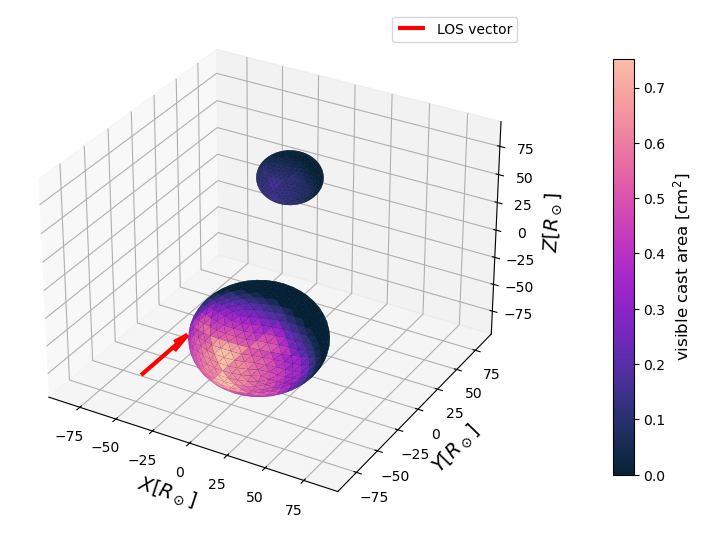

In [58]:
plot_3D_binary(pb1[0], pb2[0], scale_radius=5, draw_rotation_axes=False, property='visible_cast_areas');

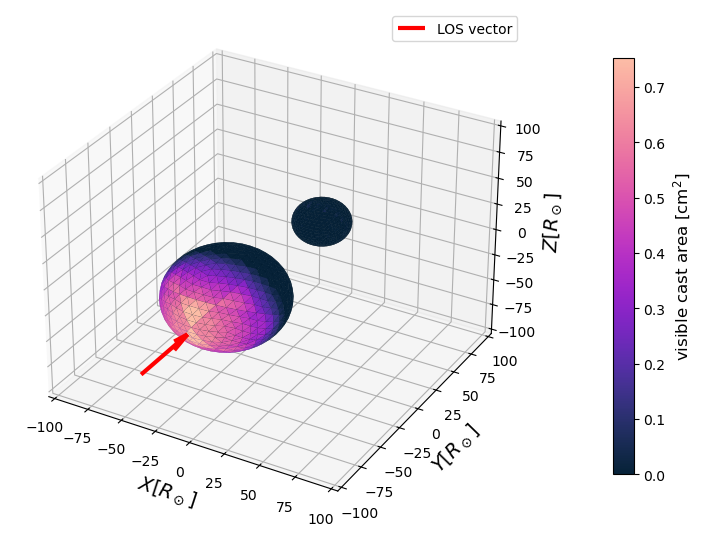

In [59]:
plot_3D_binary(pb1[primary_eclipse_idx], pb2[primary_eclipse_idx], scale_radius=5, draw_rotation_axes=False, property='visible_cast_areas');

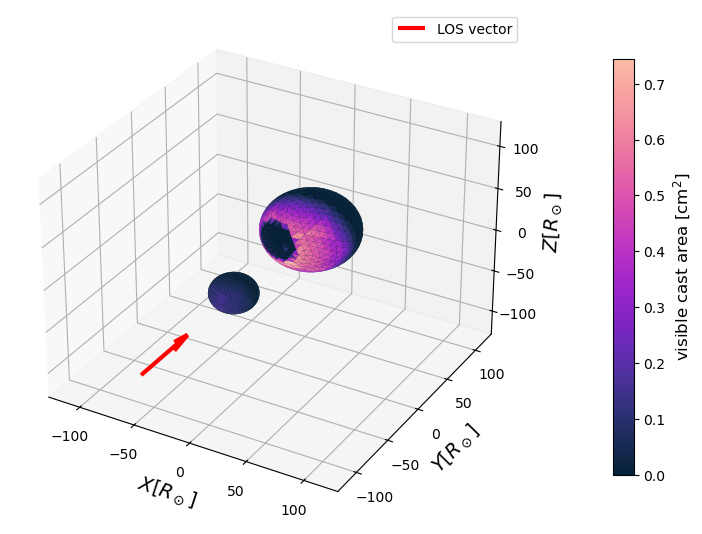

In [60]:
plot_3D_binary(pb1[secondary_eclipse_idx], pb2[secondary_eclipse_idx], scale_radius=5, draw_rotation_axes=False, property='visible_cast_areas');

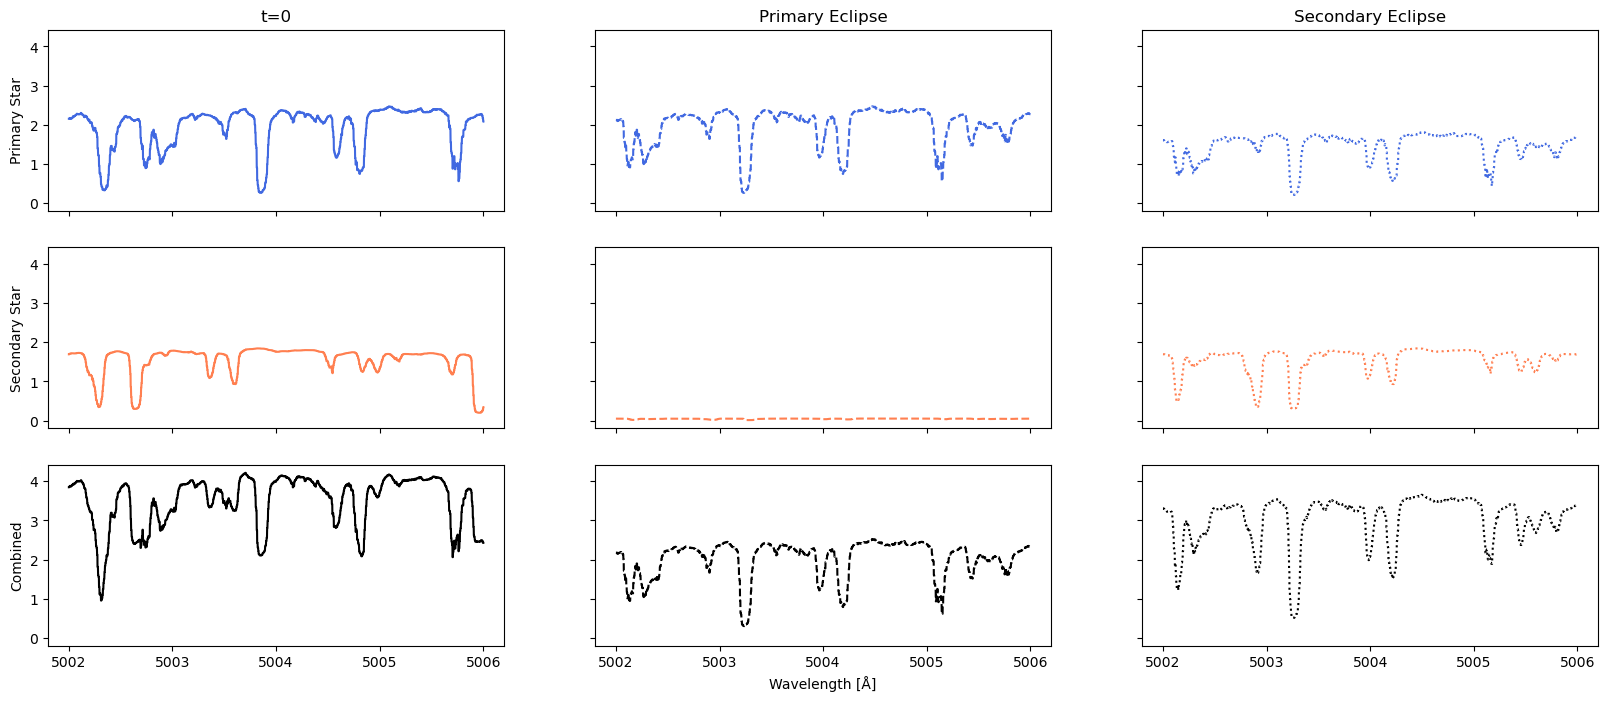

In [62]:
# Create a figure with three subplots for the spectra
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=3, figsize=(20, 8), sharex=True, sharey=True)

s1, s2 = spectra1[0], spectra2[0]
time = data_close['times'][0]

# Plot individual spectra with labels for legend
ax1[0].plot(wavelengths, s1[:, 0], color='royalblue')
ax2[0].plot(wavelengths, s2[:, 0], color='coral')
# Plot combined spectrum
ax3[0].plot(wavelengths, s1[:, 0] + s2[:, 0], color='black', label='Initial')

i = primary_eclipse_idx
s1, s2 = spectra1[i], spectra2[i]
time = data_close['times'][i]
ax1[1].plot(wavelengths, s1[:, 0], color='royalblue', linestyle='--')
ax2[1].plot(wavelengths, s2[:, 0], color='coral', linestyle='--')
# Plot combined spectrum
ax3[1].plot(wavelengths, s1[:, 0] + s2[:, 0], color='black', linestyle='--', label='Primary Eclipse')

i = secondary_eclipse_idx
s1, s2 = spectra1[i], spectra2[i]
time = data_close['times'][i]
ax1[2].plot(wavelengths, s1[:, 0], color='royalblue', linestyle='dotted')
ax2[2].plot(wavelengths, s2[:, 0], color='coral', linestyle='dotted')
# Plot combined spectrum
ax3[2].plot(wavelengths, s1[:, 0] + s2[:, 0], color='black', linestyle='dotted', label='Secondary Eclipse')

ax1[0].set_title('t=0')
ax1[1].set_title('Primary Eclipse')
ax1[2].set_title('Secondary Eclipse')

# Add labels and titles
# ax1.set_title('Primary Star Spectrum')
# ax2.set_title('Secondary Star Spectrum')
# ax3.set_title('Combined Spectrum')

ax2[0].set_ylabel('Normalized Flux')
ax3[1].set_xlabel('Wavelength [Å]')

ax1[0].set_ylabel('Primary Star')
ax2[0].set_ylabel('Secondary Star') 
ax3[0].set_ylabel('Combined')

ax1[0].set_xticks(np.arange(5002, 5007, 1))

# ax1[2].set_ylabel('Flux [erg/s/cm³]')
# ax2[2].set_ylabel('Flux [erg/s/cm³]')
# ax3[2].set_ylabel('Flux [erg/s/cm³]')

# Add single legend in upper right corner
# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(loc='upper right', bbox_to_anchor=(.9, .925))

# TODO: primary eclipse is which one?

In [49]:
# times = data['times'][5:]
# pb1 = data['mesh_body1'][5:]
# pb2 = data['mesh_body2'][5:]
# spectra1 = data['spectra_body1'][5:]
# spectra2 = data['spectra_body2'][5:]
# wavelengths = data['wavelengths']

In [83]:
mag_g = [AB_passband_luminosity(gaia_g, data['wavelengths'], s1[:, 0]+s2[:, 0])
         for s1, s2 in zip(spectra1, spectra2)]
mag_rp = [AB_passband_luminosity(gaia_rp, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)]
mag_bp = [AB_passband_luminosity(gaia_bp, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)]
mag_bol = [AB_passband_luminosity(bol, data['wavelengths'], s1[:, 0]+s2[:, 0])
           for s1, s2 in zip(spectra1, spectra2)]

TypeError: mul got incompatible shapes for broadcasting: (100000,), (10000,).

In [53]:
import matplotlib
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (150,) and (145,)

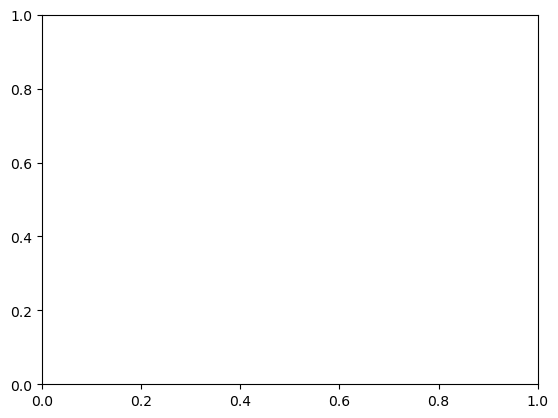

In [84]:
plt.plot(data_close['times'], np.array(mag_g)-mag_g[0], marker='o', color='black', linestyle='--', markersize=4)
plt.gca().invert_yaxis();
plt.xlabel('Time [days]')
plt.ylabel('Luminosity change [mag]');

In [56]:
# Find the time of minimum brightness (eclipse)
eclipse_time = times[np.argmin(mag_g)]
print(f"Eclipse occurs at t = {eclipse_time:.3f} days")


Eclipse occurs at t = 0.111 days


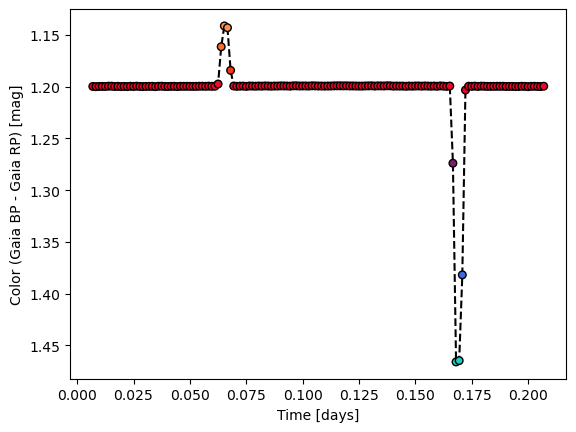

In [14]:
# Create a colormap for the BP-RP color values
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import cmasher as cmr

# Calculate BP-RP color values
bp_rp_values = np.array(mag_bp)-np.array(mag_rp)

# Create a colormap and normalize the color values
cmap = plt.cm.viridis
norm = Normalize(vmin=min(bp_rp_values), vmax=max(bp_rp_values))
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Plot with colors based on BP-RP values
plt.scatter(times, bp_rp_values, c=bp_rp_values, cmap='cmr.guppy', norm=norm, s=30, zorder=2, edgecolor='black')
plt.plot(times, bp_rp_values, linestyle='--', zorder=1, color='black')
plt.gca().invert_yaxis();
plt.xlabel('Time [days]')
plt.ylabel('Color (Gaia BP - Gaia RP) [mag]');

In [12]:
from spice.plots.plot_mesh import animate_binary_and_spectrum
animate_binary_and_spectrum(pb1, pb2, np.array(spectra1)[:, :, 0]+np.array(spectra2)[:, :, 0], data['wavelengths'], filename='tz_fornacis_animation_spectrum_closeup.gif', property='visible_cast_areas', property_label='Visible Cast Areas', timestamps=times, timestamp_label='days', scale_radius=10)

'tz_fornacis_animation_spectrum_closeup.gif'

In [13]:
from spice.plots.plot_mesh import animate_binary_and_separate_spectra

animate_binary_and_separate_spectra(pb1, pb2, np.array(spectra1)[:, :, 0], np.array(spectra2)[:, :, 0], data['wavelengths'], filename='tz_fornacis_animation_separate_spectra.gif', property='visible_cast_areas', property_label='Visible Cast Areas', timestamps=times, timestamp_label='days', scale_radius=10)

'tz_fornacis_animation_separate_spectra.gif'

In [12]:
wavelengths_fe_small = wavelengths[(wavelengths > 5002) & (wavelengths < 5006)]
spectra1_fe_small = np.array(spectra1)[:, (wavelengths > 5002) & (wavelengths < 5006), 0]
spectra2_fe_small = np.array(spectra2)[:, (wavelengths > 5002) & (wavelengths < 5006), 0]

In [14]:
animate_binary_and_separate_spectra(pb1, pb2,
                                    spectra1_fe_small,
                                    spectra2_fe_small, 
                                    wavelengths_fe_small,
                                    filename='tz_fornacis_animation_separate_spectra_fe.gif', property='visible_cast_areas', property_label='Visible Cast Areas', timestamps=times, timestamp_label='days', scale_radius=10)

'tz_fornacis_animation_separate_spectra_fe.gif'

In [7]:
from spice.plots.plot_mesh import animate_binary_and_lightcurve


animate_binary_and_lightcurve(pb1, pb2, np.array(mag_g), timestamps=times,
                              filename='tz_fornacis_animation_lc.gif', property='visible_cast_areas', property_label='Visible Cast Areas', timestamp_label='days', scale_radius=10)

'tz_fornacis_animation_lc.gif'